In [1]:
# current ADAM resnet18 with 200 epochs is 76% accuracy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
from numpy import asarray
import PIL.Image as Image
import torch.nn as nn
import tqdm
import gc

device = "cuda"

torch.cuda.empty_cache()
gc.collect()
        
import torchvision.transforms as transforms
transform = transforms.ToTensor()

In [2]:
# get dataset stuffs
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.utils import load_state_dict_from_url

transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = torchvision.datasets.CIFAR10(root="based", train=False, download=True, transform=transform)

val_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


dataset = torchvision.datasets.CIFAR10(root="based", train=True, download=True, transform=transform)

train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

0it [00:00, ?it/s]

Extracting based/cifar-10-python.tar.gz to based
Files already downloaded and verified


In [3]:
!pip install vit-pytorch

In [4]:
def testb():
    acc = 0
    total = 0
    for n_, (x, y) in enumerate(val_dataloader):
        x = x.to(device)
        bs = x.shape[0]
        x = x.reshape(bs, 3, 32, 32)
        
        y_hat = v(x) # add encodings?
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [5]:

import torch
from vit_pytorch import ViT

# get ViT-B/16 model

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 10,
    dim = 768,
    depth = 12,
    heads = 12,
    mlp_dim = 3072,
    dropout = 0.1,
    emb_dropout = 0.1
)
v.eval()

# initialize stuffs
losslist_n = []
v = v.to(device)
voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
import random

acc = 0
total = 0
# do loop for baseline
for epoch in range(200):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0
    # loop over data
    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        
        # change device to gpu
        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        x = x.reshape(bs, 3, 32, 32)
        f_y_hat = v(x)
        
        # backward pass
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()
        loss.backward()
        tloss += loss
        
        # optimize
        voptimizer.step() 
        voptimizer.zero_grad()
        
        # keep track of this epoch's loss
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
        
    # test epoch's accuracy and append it to the list
    l = testb()
    print(l)
    losslist_n.append(l)
    
# 5 = 2 normal
# new 1.8 = 5


1.9633511913066009: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.4132


1.6177270071847099: 100%|██████████| 196/196 [00:46<00:00,  4.26it/s]


0.4589


1.5137319759446748: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.4987


1.4329591089365434: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.5169


1.379093092315051: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.5235


1.3395130391023597: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.5364


1.293146172348334: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.5478


1.262070792061942: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.5506


1.2317036998515227: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.5717


1.2015811375209264: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.5792


1.1725553395796795: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.5831


1.1465630044742507: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.5864


1.122893897854552: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.5893


1.089991044025032: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6025


1.0655608663753586: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6018


1.0406100993253746: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6065


1.0207915792659836: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6184


0.9939408594248246: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6211


0.9668559638821349: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.6271


0.9417101023148517: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6323


0.9188664494728556: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6419


0.8928129235092475: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6393


0.8684426911023199: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6411


0.8456418562908562: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6347


0.8258463022660236: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6511


0.8002348140794404: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.6335


0.7743019571109694: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.6427


0.7504153348961655: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6492


0.7171008830167809: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6545


0.7047352693518814: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6598


0.6719614924216757: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6503


0.6445590817198461: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6579


0.6239718612359495: 100%|██████████| 196/196 [00:46<00:00,  4.24it/s]


0.6585


0.5926881128427933: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.6531


0.5685843253622249: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6611


0.5400730444460499: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.654


0.516739086228974: 100%|██████████| 196/196 [00:46<00:00,  4.23it/s]


0.6652


0.48827903124750877: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.6619


0.464324951171875: 100%|██████████| 196/196 [00:47<00:00,  4.17it/s]


0.6526


0.44331398788763554: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6564


0.41579596850336814: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.6616


0.3981071394317004: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6582


0.3743232804901746: 100%|██████████| 196/196 [00:46<00:00,  4.21it/s]


0.6554


0.35390616436393896: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6551


0.33077232205137913: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6645


0.31425353458949495: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6569


0.29837917794986646: 100%|██████████| 196/196 [00:46<00:00,  4.20it/s]


0.661


0.28179483997578525: 100%|██████████| 196/196 [00:47<00:00,  4.17it/s]


0.6624


0.2641456759705835: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6601


0.2513852411386918: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6617


0.23763952449876435: 100%|██████████| 196/196 [00:46<00:00,  4.18it/s]


0.6651


0.22349256398726483: 100%|██████████| 196/196 [00:46<00:00,  4.17it/s]


0.6571


0.21905655763587173: 100%|██████████| 196/196 [00:47<00:00,  4.16it/s]


0.6634


0.2030588266800861: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6592


0.20267231610356545: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6612


0.1837078600513692: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6616


0.1822867101552535: 100%|██████████| 196/196 [00:45<00:00,  4.29it/s]


0.658


0.17300794562514948: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6544


0.17038014470314494: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.6561


0.15478297642299108: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6609


0.15407525276651188: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6583


0.15024419706694933: 100%|██████████| 196/196 [00:47<00:00,  4.10it/s]


0.6648


0.14692361987366967: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6632


0.14290542991793886: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.6538


0.1408130003481495: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6563


0.12854157661905094: 100%|██████████| 196/196 [00:48<00:00,  4.08it/s]


0.6633


0.1285333828050263: 100%|██████████| 196/196 [00:47<00:00,  4.13it/s]


0.6613


0.1219621483160525: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6632


0.12166710289157166: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6573


0.11996357781546456: 100%|██████████| 196/196 [00:47<00:00,  4.10it/s]


0.6556


0.11583569585060587: 100%|██████████| 196/196 [00:46<00:00,  4.22it/s]


0.6605


0.11173460434894172: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.658


0.10947924244160555: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.651


0.11178575243268694: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.6596


0.10326389390595105: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.656


0.10510393064849231: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6612


0.0951614574510224: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.6576


0.09314888350817623: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6606


0.093412632844886: 100%|██████████| 196/196 [00:47<00:00,  4.09it/s]


0.6634


0.09957655108704859: 100%|██████████| 196/196 [00:48<00:00,  4.06it/s]


0.6628


0.09796794579953563: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6552


0.0900274490823551: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


0.6631


0.08763992543123206: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.664


0.08697788082823461: 100%|██████████| 196/196 [00:48<00:00,  4.05it/s]


0.6641


0.08524839245543188: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6595


0.08826099123273577: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6637


0.0853762334706832: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6614


0.07558986605430136: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6614


0.08256448045068858: 100%|██████████| 196/196 [00:45<00:00,  4.26it/s]


0.6638


0.07957897867475237: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


0.6586


0.08176491211871711: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.659


0.07388770823576013: 100%|██████████| 196/196 [00:48<00:00,  4.03it/s]


0.6594


0.07734332765851702: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.66


0.07376554060955437: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6543


0.07438701999430754: 100%|██████████| 196/196 [00:48<00:00,  4.04it/s]


0.6591


0.07244070695371044: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6605


0.07346457851176359: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6609


0.07036219324384417: 100%|██████████| 196/196 [00:47<00:00,  4.14it/s]


0.6568


0.06755504802781709: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6542


0.0683293342590332: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6607


0.06922031908619161: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.663


0.07168366471115424: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6613


0.06864408570892956: 100%|██████████| 196/196 [00:48<00:00,  4.01it/s]


0.6678


0.059773615428379605: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.661


0.06052210866188516: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.655


0.06659630853302624: 100%|██████████| 196/196 [00:49<00:00,  3.98it/s]


0.6531


0.06884504824268575: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6492


0.062309566809206594: 100%|██████████| 196/196 [00:47<00:00,  4.15it/s]


0.6611


0.0654027948574144: 100%|██████████| 196/196 [00:45<00:00,  4.30it/s]


0.6595


0.06252521398116132: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6584


0.06149820405609754: 100%|██████████| 196/196 [00:49<00:00,  3.98it/s]


0.6588


0.0612864299696319: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6593


0.06003487353422204: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6574


0.0564674795890341: 100%|██████████| 196/196 [00:49<00:00,  3.96it/s]


0.6606


0.05223375437211017: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6586


0.05773518036822883: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6616


0.05506301899345554: 100%|██████████| 196/196 [00:50<00:00,  3.92it/s]


0.6577


0.05941630382927097: 100%|██████████| 196/196 [00:45<00:00,  4.30it/s]


0.6549


0.05474497347461934: 100%|██████████| 196/196 [00:46<00:00,  4.17it/s]


0.6584


0.05345644269670759: 100%|██████████| 196/196 [00:46<00:00,  4.26it/s]


0.6619


0.05361951613912777: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6613


0.05208946247490085: 100%|██████████| 196/196 [00:50<00:00,  3.91it/s]


0.664


0.05294234412057059: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6595


0.0566819784592609: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6538


0.056067067749646246: 100%|██████████| 196/196 [00:50<00:00,  3.92it/s]


0.6592


0.05185043081945302: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6635


0.04960653733234016: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6616


0.04942177266490703: 100%|██████████| 196/196 [00:49<00:00,  3.94it/s]


0.6605


0.05344814183760663: 100%|██████████| 196/196 [00:45<00:00,  4.31it/s]


0.6662


0.04708385467529297: 100%|██████████| 196/196 [00:46<00:00,  4.25it/s]


0.6612


0.049098447877533584: 100%|██████████| 196/196 [00:47<00:00,  4.11it/s]


0.6592


0.04780611699941207: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6602


0.053364330408524493: 100%|██████████| 196/196 [00:49<00:00,  3.99it/s]


0.6652


0.05004957257484903: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6531


0.04865015282922862: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]


0.6565


0.043680974415370395: 100%|██████████| 196/196 [00:50<00:00,  3.87it/s]


0.6587


0.04675634539857203: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6625


0.04398763909631846: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6523


0.04791557545564613: 100%|██████████| 196/196 [00:50<00:00,  3.89it/s]


0.6555


0.04487772377169862: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6516


0.046506915773664205: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6556


0.04285226549421038: 100%|██████████| 196/196 [00:49<00:00,  3.92it/s]


0.6652


0.0413182122366769: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6562


0.045717088543638894: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6606


0.04547455359478386: 100%|██████████| 196/196 [00:49<00:00,  3.95it/s]


0.6579


0.044246839017284156: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6619


0.04402991703578404: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.6603


0.04466023737070512: 100%|██████████| 196/196 [00:46<00:00,  4.19it/s]


0.6587


0.043923635872042906: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6581


0.042573009218488424: 100%|██████████| 196/196 [00:50<00:00,  3.90it/s]


0.6595


0.04133151502025371: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6608


0.04121085089080188: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6513


0.04059073389792929: 100%|██████████| 196/196 [00:51<00:00,  3.84it/s]


0.6601


0.03893458113378408: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6558


0.04216019961298728: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6517


0.042270825833690406: 100%|██████████| 196/196 [00:51<00:00,  3.82it/s]


0.6547


0.04064563099218874: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6585


0.032605280681532255: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6552


0.03987850218403096: 100%|██████████| 196/196 [00:51<00:00,  3.82it/s]


0.6577


0.03815844837500124: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6558


0.03868904648994913: 100%|██████████| 196/196 [00:45<00:00,  4.30it/s]


0.6556


0.04247487807760433: 100%|██████████| 196/196 [00:51<00:00,  3.83it/s]


0.6545


0.03815526621682303: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.661


0.03655536320744729: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6599


0.035264832632882256: 100%|██████████| 196/196 [00:49<00:00,  3.93it/s]


0.6576


0.037104849912682356: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6587


0.03568717411586216: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6582


0.03662536582168268: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6582


0.035753133345623404: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6573


0.036671453592728595: 100%|██████████| 196/196 [00:51<00:00,  3.79it/s]


0.6561


0.040188592307421625: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6563


0.03494832953628229: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6605


0.03556276827442403: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6571


0.03302844203248316: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6582


0.039208091035181164: 100%|██████████| 196/196 [00:50<00:00,  3.89it/s]


0.6578


0.03735135282788958: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6592


0.03352061583071339: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6573


0.0350574084690639: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6543


0.03367087305808554: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6528


0.035203666103129486: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6584


0.035356961950963856: 100%|██████████| 196/196 [00:49<00:00,  3.93it/s]


0.6562


0.03245452472141811: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6602


0.031273036586995026: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6615


0.03425935336521694: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6558


0.03553422616452587: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6614


0.030214487289895817: 100%|██████████| 196/196 [00:51<00:00,  3.77it/s]


0.6611


0.030583466802324568: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]


0.6625


0.02851261654678656: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6606


0.032946970998024454: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6553


0.03148297631010717: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]


0.6602


0.03605422438407431: 100%|██████████| 196/196 [00:48<00:00,  4.02it/s]


0.6592


0.03673773395771883: 100%|██████████| 196/196 [00:47<00:00,  4.12it/s]


0.652


0.03216618907694914: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6589


0.03060588788013069: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]


0.6614


0.031128851734862035: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]


0.6592


0.02556210148091219: 100%|██████████| 196/196 [00:45<00:00,  4.33it/s]


0.6584


0.03164421052348857: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]


0.6577


0.030766370345135123: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]


0.6503


0.027793125230438854: 100%|██████████| 196/196 [00:45<00:00,  4.30it/s]


0.6521


0.03231232263603989: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]


0.6554


In [6]:
# load in ViT-b/16 results from the above code ran in previous version, I seperated these two in case the session was terminated and the data would be lost
#losslist_n = [0.3157, 0.3891, 0.439, 0.4689, 0.477, 0.4756, 0.5138, 0.5237, 0.5193, 0.5305, 0.5254, 0.5387, 0.538, 0.5333, 0.5338, 0.537, 0.5315, 0.5291, 0.5326, 0.5311, 0.5343, 0.5281, 0.5314, 0.5348, 0.5386, 0.5441, 0.5356, 0.5313, 0.5389, 0.5413, 0.5356, 0.5364, 0.5333, 0.5355, 0.5315, 0.5379, 0.532, 0.535, 0.5357, 0.5372, 0.5377, 0.5473, 0.5449, 0.5476, 0.537, 0.54, 0.5382, 0.5447, 0.5443, 0.5383, 0.5358, 0.5437, 0.5411, 0.5445, 0.5457, 0.5427, 0.5417, 0.5376, 0.5367, 0.5335, 0.5391, 0.5463, 0.5426, 0.5446, 0.5442, 0.5437, 0.5425, 0.5407, 0.5454, 0.5453, 0.5496, 0.5428, 0.544, 0.5299, 0.5423, 0.5399, 0.5405, 0.5388, 0.5386, 0.5387, 0.5513, 0.545, 0.5419, 0.537, 0.5384, 0.5405, 0.5462, 0.5379, 0.5495, 0.55, 0.5417, 0.5526, 0.5459, 0.5427, 0.5366, 0.5468, 0.5494, 0.5487, 0.5459, 0.5411, 0.5495, 0.5474, 0.5455, 0.5498, 0.5476, 0.5476, 0.5509, 0.5454, 0.5459, 0.539, 0.545, 0.5509, 0.5467, 0.5453, 0.5409, 0.5493, 0.5422, 0.5379, 0.5439, 0.5438, 0.5488, 0.5497, 0.545, 0.5481, 0.5501, 0.5567, 0.5476, 0.5431, 0.5437, 0.5458, 0.5469, 0.5469, 0.5483, 0.5442, 0.5466, 0.5471, 0.5525, 0.546, 0.5458, 0.5472, 0.5459, 0.5471, 0.5432, 0.5493, 0.5521, 0.5455, 0.5441, 0.5422, 0.5487, 0.5507, 0.5461, 0.5522, 0.5425, 0.5502, 0.5555, 0.5563, 0.5524, 0.5537, 0.5462, 0.5571, 0.5475, 0.5464, 0.548, 0.5335, 0.5488, 0.5503, 0.5507, 0.5481, 0.5403, 0.5444, 0.5473, 0.5435, 0.5491, 0.5421, 0.5532, 0.5531, 0.5546, 0.5551, 0.5534, 0.5484, 0.5433, 0.5558, 0.5452, 0.5509, 0.5482, 0.5452, 0.5556, 0.5527, 0.5511, 0.5469, 0.5474, 0.549, 0.547, 0.5456, 0.5508, 0.5471, 0.5571, 0.5499, 0.554, 0.5525]
print(losslist_n)

torch.save(v.state_dict(), "v")

[0.4132, 0.4589, 0.4987, 0.5169, 0.5235, 0.5364, 0.5478, 0.5506, 0.5717, 0.5792, 0.5831, 0.5864, 0.5893, 0.6025, 0.6018, 0.6065, 0.6184, 0.6211, 0.6271, 0.6323, 0.6419, 0.6393, 0.6411, 0.6347, 0.6511, 0.6335, 0.6427, 0.6492, 0.6545, 0.6598, 0.6503, 0.6579, 0.6585, 0.6531, 0.6611, 0.654, 0.6652, 0.6619, 0.6526, 0.6564, 0.6616, 0.6582, 0.6554, 0.6551, 0.6645, 0.6569, 0.661, 0.6624, 0.6601, 0.6617, 0.6651, 0.6571, 0.6634, 0.6592, 0.6612, 0.6616, 0.658, 0.6544, 0.6561, 0.6609, 0.6583, 0.6648, 0.6632, 0.6538, 0.6563, 0.6633, 0.6613, 0.6632, 0.6573, 0.6556, 0.6605, 0.658, 0.651, 0.6596, 0.656, 0.6612, 0.6576, 0.6606, 0.6634, 0.6628, 0.6552, 0.6631, 0.664, 0.6641, 0.6595, 0.6637, 0.6614, 0.6614, 0.6638, 0.6586, 0.659, 0.6594, 0.66, 0.6543, 0.6591, 0.6605, 0.6609, 0.6568, 0.6542, 0.6607, 0.663, 0.6613, 0.6678, 0.661, 0.655, 0.6531, 0.6492, 0.6611, 0.6595, 0.6584, 0.6588, 0.6593, 0.6574, 0.6606, 0.6586, 0.6616, 0.6577, 0.6549, 0.6584, 0.6619, 0.6613, 0.664, 0.6595, 0.6538, 0.6592, 0.6635, 0.661

In [7]:
def test(f):
    acc = 0
    total = 0
    # loop over test set
    for n_, (x, y) in enumerate(val_dataloader):
        bs = x.shape[0]
        x = x.to(device)
        
        # f is how many times ViT loops over data
        for i in range(f):
            x = v(x)
            x = x.reshape(bs, 3, 32, 32)
            
        # apply Head
        y_hat = Head(x)
        
        # loop over predicted and see if equal to the ground truth
        for _, i in enumerate(y_hat):
            if i.argmax() == y.to(device)[_]:
                acc +=1
            total +=1
            
    return acc/total

In [8]:
# blank module to replace nn.Softmaxes with
class make_linear(torch.nn.Module):
    def __init__(self):
        super(make_linear, self).__init__()

    def forward(self, x):
        return x

In [9]:
def replace_layers(model, old, new):
    # stolen from stack overflow, replaces all non linearities so that transformers are linear
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            ## compound module, go inside it
            replace_layers(module, old, new)
            
        if isinstance(module, old):
            ## simple module
            setattr(model, n, new)

In [10]:
import torch
from vit_pytorch import ViT

v = ViT(
    image_size = 32,
    patch_size = 16,
    num_classes = 10,
    dim = 768,
    depth = 4,
    heads = 2,
    mlp_dim = 1024,
    dropout = 0.1,
    emb_dropout = 0.1
)
v.eval()
v = torch.nn.Sequential(*(list(v.children())[:-1])) # get rid of MLP dim
# MLP dim consists of Layernorm and then activationless FC
v = torch.nn.Sequential(*(list(v.children()) + [nn.BatchNorm1d(4)])) #
#replace_layers(v, nn.Softmax, make_linear())

losslist_r = []

#Head = torch.nn.Sequential(*(list([ViT(image_size=32, patch_size=32, num_classes=10, dim=768, depth=1, heads=4, mlp_dim=3072)]))) # might want to increase head size bc the ViT is just interpresting patterns this actually makes decision
Head = torch.nn.Sequential(*(list([nn.Flatten(), nn.LayerNorm(3072), nn.Linear(3072, 10)])))


v = v.to(device)
Head = Head.to(device)

voptimizer = torch.optim.Adam(v.parameters(), lr=.0001)
hoptimizer = torch.optim.Adam(Head.parameters(), lr=.0001)
import random
loops = 2 # might need to reward not having vanishing things, right now problem is prob that numbers get smaller and smaller - actually use Batch norm

acc = 0
total = 0

for epoch in range(200):
    t = tqdm.tqdm(train_dataloader, position=0, leave=True)
    tloss = 0

    for n, (x, y) in enumerate(t):
        bs = x.shape[0]
        x = x.to(device)
        #print(x.shape)
        y = y.to(device)
        
        for i in range(loops):
            
            x = v(x)
            x = x.reshape(bs, 3, 32, 32)
            #print(x[0][0][0])
            #print(x.shape)

        f_y_hat = Head(x)
        
        loss = torch.nn.CrossEntropyLoss()((f_y_hat).reshape([bs, 10]), y) # nn.ReLU()
        loss.backward()
        tloss += loss

        hoptimizer.step() 
        hoptimizer.zero_grad()
        voptimizer.step() 
        voptimizer.zero_grad()
        
        t.set_description_str(str(tloss.detach().cpu().numpy()/(n+1))) # 14:.2
    l = test(loops)
    print(l)
    losslist_r.append(l)
        
# do hyperparam search on heads, depth and how many times to recurse

1.7783050537109375: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]


0.4269


1.5519097775829083: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.4694


1.4573169630400988: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.5034


1.3982993923887914: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.5299


1.3443960073042889: 100%|██████████| 196/196 [00:24<00:00,  7.98it/s]


0.5394


1.305388625787229: 100%|██████████| 196/196 [00:23<00:00,  8.30it/s]


0.5493


1.263724268699179: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


0.5615


1.2289378886320153: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]


0.5834


1.2000085480359135: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


0.5949


1.1721896735989317: 100%|██████████| 196/196 [00:33<00:00,  5.82it/s]


0.5906


1.144601705122967: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6022


1.1137506913165658: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


0.6111


1.0942065180564413: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]


0.6098


1.0681929296376753: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6249


1.0469168838189573: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.6178


1.022109518245775: 100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


0.6285


0.9986754436882175: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6362


0.9790447780064174: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]


0.6389


0.9589421019262198: 100%|██████████| 196/196 [00:31<00:00,  6.23it/s]


0.6468


0.9426632316745057: 100%|██████████| 196/196 [00:29<00:00,  6.70it/s]


0.6498


0.9178402959084024: 100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


0.649


0.9036440946617905: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.6572


0.8827879769461495: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6537


0.8681049736178651: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


0.666


0.8496645713339046: 100%|██████████| 196/196 [00:23<00:00,  8.29it/s]


0.673


0.8305948997030452: 100%|██████████| 196/196 [00:23<00:00,  8.19it/s]


0.6683


0.8170840204978476: 100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


0.6701


0.7964833317970743: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]


0.6695


0.7841314977529098: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


0.6727


0.7600695551658163: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


0.6735


0.7490389298419563: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6725


0.729607562629544: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6736


0.714368859115912: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6828


0.7014780628437899: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


0.6811


0.6874423902861926: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


0.6826


0.6652078433912627: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.6849


0.6505981756716358: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6823


0.6331928019620934: 100%|██████████| 196/196 [00:25<00:00,  7.61it/s]


0.6876


0.6215257839280732: 100%|██████████| 196/196 [00:36<00:00,  5.39it/s]


0.6843


0.6078093781763193: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6892


0.5915984328912229: 100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


0.6858


0.5781511189986248: 100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


0.6859


0.5646675265565211: 100%|██████████| 196/196 [00:23<00:00,  8.26it/s]


0.6851


0.5472923590212452: 100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


0.6875


0.5313409688521404: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6925


0.5108909996188417: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]


0.6876


0.5018210508385483: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6894


0.48401299301458867: 100%|██████████| 196/196 [00:30<00:00,  6.41it/s]


0.6914


0.466770989554269: 100%|██████████| 196/196 [00:33<00:00,  5.93it/s]


0.6885


0.45177280659578284: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]


0.6874


0.4428300662916534: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.6902


0.42906103328782685: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6971


0.41569943330725845: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.692


0.4040035714908522: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.6941


0.38694615266761: 100%|██████████| 196/196 [00:24<00:00,  7.92it/s]


0.6888


0.37048810842085855: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]


0.6891


0.3633270263671875: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]


0.6867


0.3473429387929488: 100%|██████████| 196/196 [00:34<00:00,  5.76it/s]


0.6895


0.3389922940001196: 100%|██████████| 196/196 [00:29<00:00,  6.60it/s]


0.6943


0.32942172459193636: 100%|██████████| 196/196 [00:24<00:00,  7.99it/s]


0.6852


0.31305634245580555: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6923


0.30830990538305164: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.6888


0.30025879217653856: 100%|██████████| 196/196 [00:24<00:00,  7.88it/s]


0.6884


0.28880627301274514: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


0.6904


0.2807777755114497: 100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


0.6868


0.2659799225476323: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]


0.6922


0.26742497268988163: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


0.6931


0.263456578157386: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


0.6902


0.24762095237264828: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


0.6923


0.24128497376733896: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.688


0.2293348507005341: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.6944


0.22654858414007692: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6845


0.21341251840396802: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]


0.6871


0.2173563898826132: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.6873


0.2086141352750817: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


0.6881


0.20657533528853436: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.6916


0.19304847717285156: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]


0.69


0.19341371497329402: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s]


0.6927


0.18448477375264072: 100%|██████████| 196/196 [00:26<00:00,  7.28it/s]


0.6917


0.18202330141651388: 100%|██████████| 196/196 [00:24<00:00,  8.11it/s]


0.6889


0.17044164696518255: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6904


0.17130417726477798: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6833


0.17159999146753427: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6862


0.1606246500599141: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.6838


0.16518960680280412: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


0.6908


0.16942057317616988: 100%|██████████| 196/196 [00:23<00:00,  8.19it/s]


0.6891


0.15960879228552993: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.6931


0.1546308167126714: 100%|██████████| 196/196 [00:38<00:00,  5.15it/s]


0.6901


0.14599753399284518: 100%|██████████| 196/196 [00:27<00:00,  7.16it/s]


0.6894


0.14237411654725365: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6907


0.14126872043220365: 100%|██████████| 196/196 [00:24<00:00,  7.92it/s]


0.6905


0.1389179716304857: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6919


0.13635195518026547: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6855


0.14194213127603336: 100%|██████████| 196/196 [00:24<00:00,  7.98it/s]


0.6854


0.139612898534658: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6909


0.13398485767598056: 100%|██████████| 196/196 [00:23<00:00,  8.19it/s]


0.6865


0.13057903367645887: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.689


0.12492997305733818: 100%|██████████| 196/196 [00:38<00:00,  5.05it/s]


0.6831


0.12467352224856007: 100%|██████████| 196/196 [00:28<00:00,  6.84it/s]


0.6888


0.12371720099935726: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


0.6856


0.12220570505881796: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


0.6922


0.11567161521133111: 100%|██████████| 196/196 [00:24<00:00,  7.99it/s]


0.6831


0.1202249526977539: 100%|██████████| 196/196 [00:24<00:00,  8.10it/s]


0.6883


0.11975701974362743: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


0.6864


0.11164792703122509: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6913


0.11200852296790298: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


0.6916


0.1133873803274972: 100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


0.6884


0.10821550719592037: 100%|██████████| 196/196 [00:37<00:00,  5.25it/s]


0.6861


0.10706286527672593: 100%|██████████| 196/196 [00:29<00:00,  6.66it/s]


0.6863


0.104141751114203: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]


0.6893


0.10761619100765306: 100%|██████████| 196/196 [00:24<00:00,  7.91it/s]


0.6862


0.10253994805472237: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


0.6852


0.1043632273771325: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]


0.6828


0.09712181285936006: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6873


0.09970047035995795: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6852


0.09737710563503967: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


0.686


0.09884314634362046: 100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


0.6902


0.10272142838458626: 100%|██████████| 196/196 [00:36<00:00,  5.36it/s]


0.6886


0.09181546191779935: 100%|██████████| 196/196 [00:30<00:00,  6.45it/s]


0.6859


0.09297222993811782: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6847


0.09223499103468291: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6866


0.0925193806083835: 100%|██████████| 196/196 [00:23<00:00,  8.29it/s]


0.6927


0.09458105904715401: 100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


0.6892


0.09018295638415279: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]


0.6935


0.08810183466697226: 100%|██████████| 196/196 [00:24<00:00,  8.07it/s]


0.6849


0.09036830006813516: 100%|██████████| 196/196 [00:24<00:00,  7.98it/s]


0.6821


0.08958620927771743: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6904


0.08687835810135822: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]


0.6914


0.08452730762715242: 100%|██████████| 196/196 [00:33<00:00,  5.88it/s]


0.6879


0.08629542954114018: 100%|██████████| 196/196 [00:24<00:00,  8.16it/s]


0.6859


0.09059465174772302: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.6861


0.08980392923160475: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6883


0.08487318973152005: 100%|██████████| 196/196 [00:24<00:00,  8.05it/s]


0.6899


0.08313356127057757: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6838


0.08419871816829759: 100%|██████████| 196/196 [00:24<00:00,  8.14it/s]


0.6842


0.08353754938865195: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6848


0.0784031614965322: 100%|██████████| 196/196 [00:25<00:00,  7.61it/s]


0.6875


0.07667088995174486: 100%|██████████| 196/196 [00:24<00:00,  7.85it/s]


0.6867


0.07613629224349042: 100%|██████████| 196/196 [00:24<00:00,  7.89it/s]


0.6913


0.07004561229627959: 100%|██████████| 196/196 [00:25<00:00,  7.84it/s]


0.687


0.07483137870321468: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6904


0.07293356194788096: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6895


0.07731171043551698: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]


0.6875


0.0754602928550876: 100%|██████████| 196/196 [00:24<00:00,  7.94it/s]


0.6854


0.07957914897373744: 100%|██████████| 196/196 [00:24<00:00,  7.97it/s]


0.6876


0.08026665570784589: 100%|██████████| 196/196 [00:26<00:00,  7.47it/s]


0.6901


0.07478735884841607: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]


0.6842


0.07086904681458765: 100%|██████████| 196/196 [00:28<00:00,  6.79it/s]


0.6889


0.07146851870478416: 100%|██████████| 196/196 [00:25<00:00,  7.83it/s]


0.6824


0.07106338715066715: 100%|██████████| 196/196 [00:24<00:00,  7.93it/s]


0.6855


0.06872339637912049: 100%|██████████| 196/196 [00:24<00:00,  7.85it/s]


0.6837


0.0719355904326147: 100%|██████████| 196/196 [00:24<00:00,  7.89it/s]


0.6854


0.07280608585902623: 100%|██████████| 196/196 [00:24<00:00,  7.86it/s]


0.6878


0.06859423189747091: 100%|██████████| 196/196 [00:24<00:00,  8.01it/s]


0.6867


0.0675650421453982: 100%|██████████| 196/196 [00:24<00:00,  8.12it/s]


0.6869


0.0679698574299715: 100%|██████████| 196/196 [00:23<00:00,  8.20it/s]


0.686


0.06989157443143884: 100%|██████████| 196/196 [00:24<00:00,  7.93it/s]


0.6839


0.06462779823614627: 100%|██████████| 196/196 [00:24<00:00,  8.06it/s]


0.69


0.06398330902566715: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6835


0.0674891033951117: 100%|██████████| 196/196 [00:24<00:00,  7.95it/s]


0.6872


0.06603216151801908: 100%|██████████| 196/196 [00:24<00:00,  7.96it/s]


0.6846


0.06901910840248575: 100%|██████████| 196/196 [00:24<00:00,  8.02it/s]


0.6888


0.06612528100305674: 100%|██████████| 196/196 [00:24<00:00,  7.97it/s]


0.6894


0.06894925662449428: 100%|██████████| 196/196 [00:24<00:00,  7.94it/s]


0.6817


0.06784171960791763: 100%|██████████| 196/196 [00:31<00:00,  6.21it/s]


0.6826


0.06586790571407396: 100%|██████████| 196/196 [00:38<00:00,  5.13it/s]


0.6823


0.05806656759612414: 100%|██████████| 196/196 [00:24<00:00,  7.95it/s]


0.687


0.05787051940450863: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


0.6848


0.06525211431542222: 100%|██████████| 196/196 [00:24<00:00,  7.95it/s]


0.6871


0.060475247246878486: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6812


0.06409298157205387: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6836


0.06402159223751146: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6821


0.05796932200996243: 100%|██████████| 196/196 [00:24<00:00,  7.90it/s]


0.6871


0.06195384142350177: 100%|██████████| 196/196 [00:23<00:00,  8.25it/s]


0.6822


0.06419450896126884: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6824


0.056759732110159736: 100%|██████████| 196/196 [00:24<00:00,  8.08it/s]


0.6767


0.05606603135867995: 100%|██████████| 196/196 [00:24<00:00,  7.94it/s]


0.6809


0.059927220247229754: 100%|██████████| 196/196 [00:24<00:00,  8.03it/s]


0.6789


0.05683124308683434: 100%|██████████| 196/196 [00:23<00:00,  8.21it/s]


0.6876


0.05756514413016183: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6853


0.060124368083720306: 100%|██████████| 196/196 [00:24<00:00,  8.00it/s]


0.6822


0.060225559740650414: 100%|██████████| 196/196 [00:24<00:00,  8.13it/s]


0.6833


0.05907579344146106: 100%|██████████| 196/196 [00:23<00:00,  8.27it/s]


0.687


0.0571538866782675: 100%|██████████| 196/196 [00:32<00:00,  6.06it/s]


0.6863


0.05568990415456344: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s]


0.6842


0.05666679265547772: 100%|██████████| 196/196 [00:24<00:00,  7.95it/s]


0.6844


0.05458254230265715: 100%|██████████| 196/196 [00:23<00:00,  8.28it/s]


0.689


0.054696151188441684: 100%|██████████| 196/196 [00:23<00:00,  8.24it/s]


0.6861


0.050963474779712914: 100%|██████████| 196/196 [00:23<00:00,  8.17it/s]


0.6838


0.05127671300148477: 100%|██████████| 196/196 [00:24<00:00,  7.90it/s]


0.6861


0.0589186464037214: 100%|██████████| 196/196 [00:23<00:00,  8.22it/s]


0.6825


0.05663027568739288: 100%|██████████| 196/196 [00:24<00:00,  8.04it/s]


0.6881


0.05587715518717863: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


0.6831


0.054867038921434054: 100%|██████████| 196/196 [00:23<00:00,  8.32it/s]


0.6855


0.053002401274077744: 100%|██████████| 196/196 [00:23<00:00,  8.37it/s]


0.6865


0.05489536207549426: 100%|██████████| 196/196 [00:24<00:00,  8.15it/s]


0.6775


0.05225921650322116: 100%|██████████| 196/196 [00:23<00:00,  8.18it/s]


0.6795


0.05393348907937809: 100%|██████████| 196/196 [00:23<00:00,  8.19it/s]


0.6819


0.05175111731704401: 100%|██████████| 196/196 [00:24<00:00,  8.09it/s]


0.6793


0.05600124962475835: 100%|██████████| 196/196 [00:23<00:00,  8.30it/s]


0.6804


In [11]:
test(loops)

0.6801

In [12]:
print(losslist_r)

[0.4269, 0.4694, 0.5034, 0.5299, 0.5394, 0.5493, 0.5615, 0.5834, 0.5949, 0.5906, 0.6022, 0.6111, 0.6098, 0.6249, 0.6178, 0.6285, 0.6362, 0.6389, 0.6468, 0.6498, 0.649, 0.6572, 0.6537, 0.666, 0.673, 0.6683, 0.6701, 0.6695, 0.6727, 0.6735, 0.6725, 0.6736, 0.6828, 0.6811, 0.6826, 0.6849, 0.6823, 0.6876, 0.6843, 0.6892, 0.6858, 0.6859, 0.6851, 0.6875, 0.6925, 0.6876, 0.6894, 0.6914, 0.6885, 0.6874, 0.6902, 0.6971, 0.692, 0.6941, 0.6888, 0.6891, 0.6867, 0.6895, 0.6943, 0.6852, 0.6923, 0.6888, 0.6884, 0.6904, 0.6868, 0.6922, 0.6931, 0.6902, 0.6923, 0.688, 0.6944, 0.6845, 0.6871, 0.6873, 0.6881, 0.6916, 0.69, 0.6927, 0.6917, 0.6889, 0.6904, 0.6833, 0.6862, 0.6838, 0.6908, 0.6891, 0.6931, 0.6901, 0.6894, 0.6907, 0.6905, 0.6919, 0.6855, 0.6854, 0.6909, 0.6865, 0.689, 0.6831, 0.6888, 0.6856, 0.6922, 0.6831, 0.6883, 0.6864, 0.6913, 0.6916, 0.6884, 0.6861, 0.6863, 0.6893, 0.6862, 0.6852, 0.6828, 0.6873, 0.6852, 0.686, 0.6902, 0.6886, 0.6859, 0.6847, 0.6866, 0.6927, 0.6892, 0.6935, 0.6849, 0.6821, 

In [13]:
torch.save(v.state_dict(), "vn")
torch.save(Head.state_dict(), "Hn")

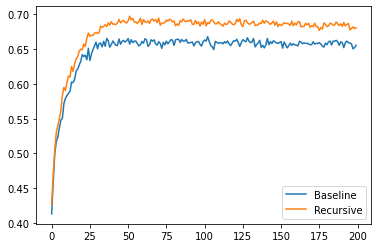

In [14]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(losslist_n))), losslist_n, label="Baseline")
plt.plot(list(range(len(losslist_r))), losslist_r, label="Recursive")
plt.legend()
plt.show()